In [12]:
from ast import arg

import matplotlib.cbook as cbook
import random
import copy
import os

import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as ticker

In [1]:
!hostname

c1b01


In [18]:
mu = 1
muName = int(mu*10)
filename = f'HNCSize_ini1_result_all_mu{muName}'
with open(f'{filename}.json', 'r') as f:
    result = json.load(f)

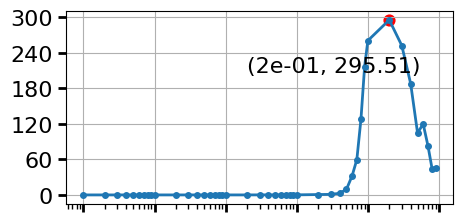

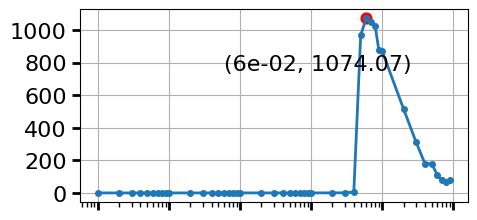

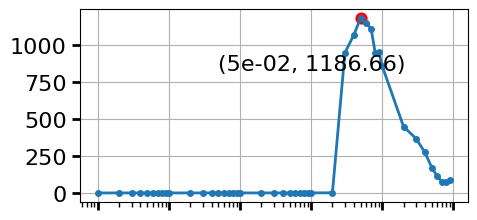

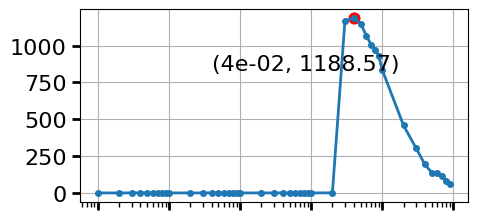

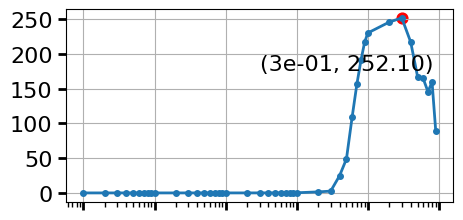

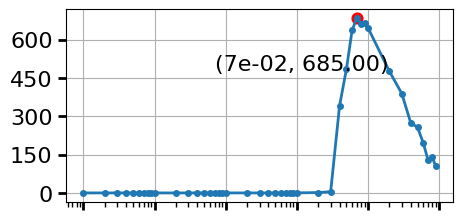

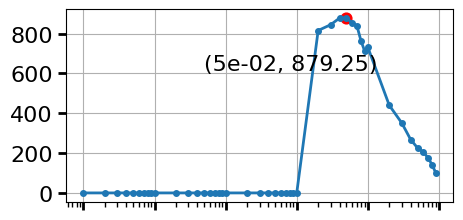

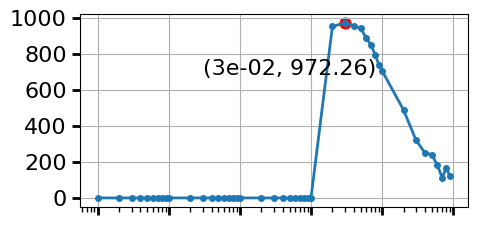

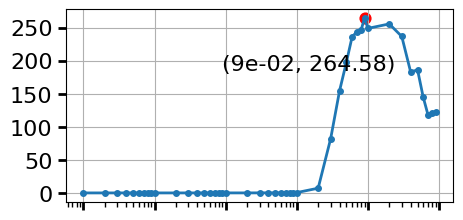

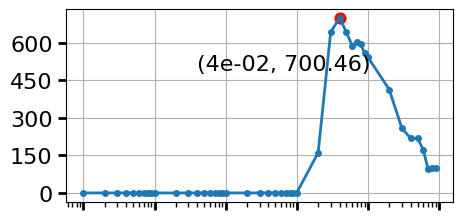

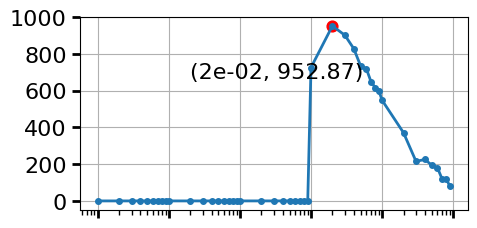

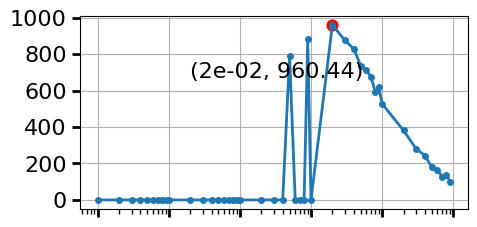

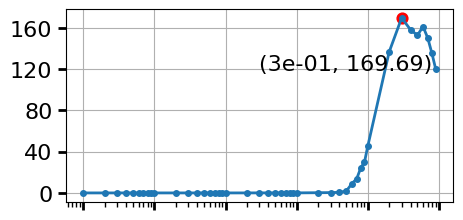

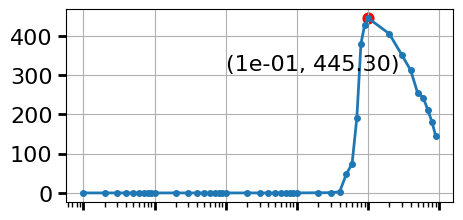

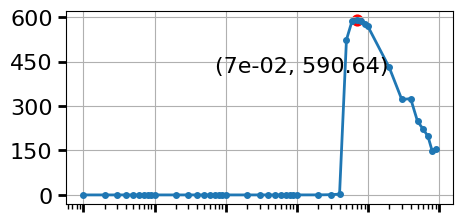

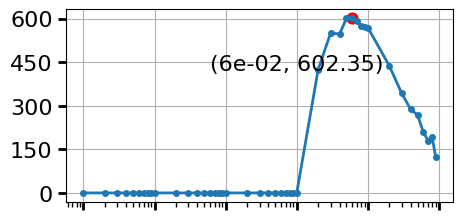

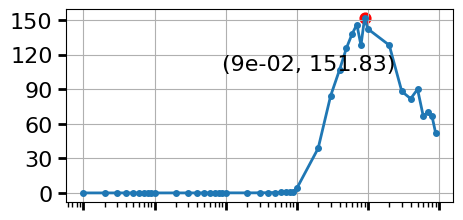

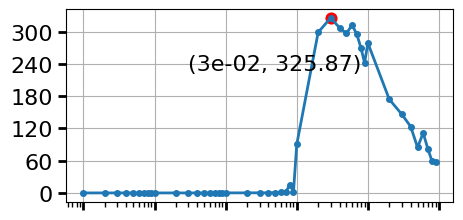

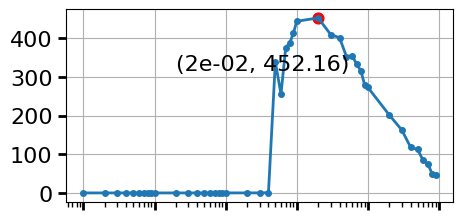

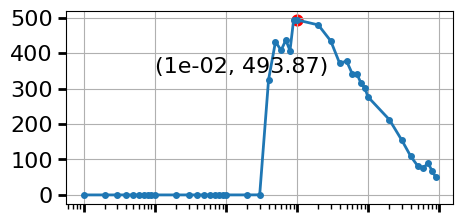

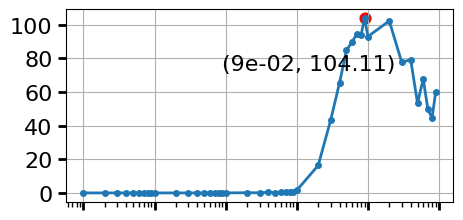

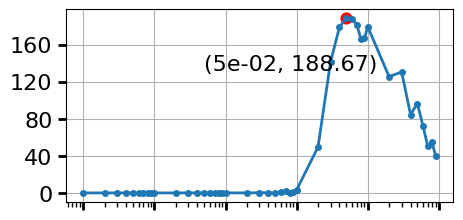

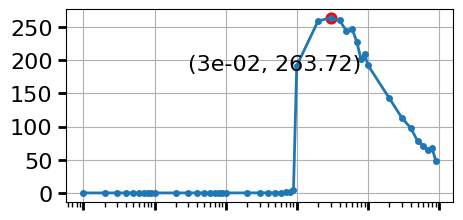

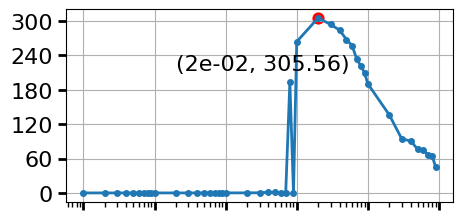

In [19]:
lLst = [
    1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
    1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
    1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
    1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
    1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
    ]
fontsize1 = 16
argmaxDic = dict()
y_dic = dict()
for net in [2,5,19,17,4,3]:#range(1,21):
    argmaxDic[net] = dict()
    for nu in [1,2,3,4]:
        y_dic[f'net{net}_nu{nu}'] = []
        argmax = (0, 0)
        for _ in lLst:
            y_dic[f'net{net}_nu{nu}'].append(result[f'net{net}_nu{nu}_l{_}'])
            if result[f'net{net}_nu{nu}_l{_}'] > argmax[1]:
                argmax = (_, result[f'net{net}_nu{nu}_l{_}'])
        argmaxDic[net][nu] = argmax[0]
        plt.figure(figsize=(5,2.5))
        plt.plot(lLst, y_dic[f'net{net}_nu{nu}'],marker='o', markersize=4 , markevery=1, linewidth=2)
        # plt.plot(lLst, y_dic[f'net{net}_nu{nu}'],marker='o', markersize=5 , markevery=9, linewidth=2)
        # plt.scatter(lLst, y_dic[f'net{net}_nu{nu}'],marker='o', s=10)
        plt.scatter(argmax[0], argmax[1], color='red', s=60)
        plt.xscale('log') 
        font_prop = FontProperties()
        font_prop.set_size(16) 
        plt.annotate(f'({argmax[0]:.0e}, {argmax[1]:.2f})', xy=(0.01*argmax[0],0.7*argmax[1]), fontproperties=font_prop)
        plt.tick_params(axis='y', labelsize=fontsize1) 
        # plt.tick_params(axis='x', labelsize=fontsize1)
        plt.tick_params(axis='y', which='major', size=6, width=2)  
        plt.tick_params(axis='x', which='major', size=6, width=2)  
        plt.tick_params(axis='x', which='minor', size=3.5, width=1) 
        plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
        # plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7)) 
        plt.grid()
        plt.gca().set_xticklabels([])
        # print(net,nu)
        muName = int(mu*10)
        plt.savefig(f'savefig_si_HNCSA_lc/lc_mu{muName}_net{net}_nu{nu}_grid.svg', format='svg', bbox_inches='tight',dpi=300)
        plt.show()


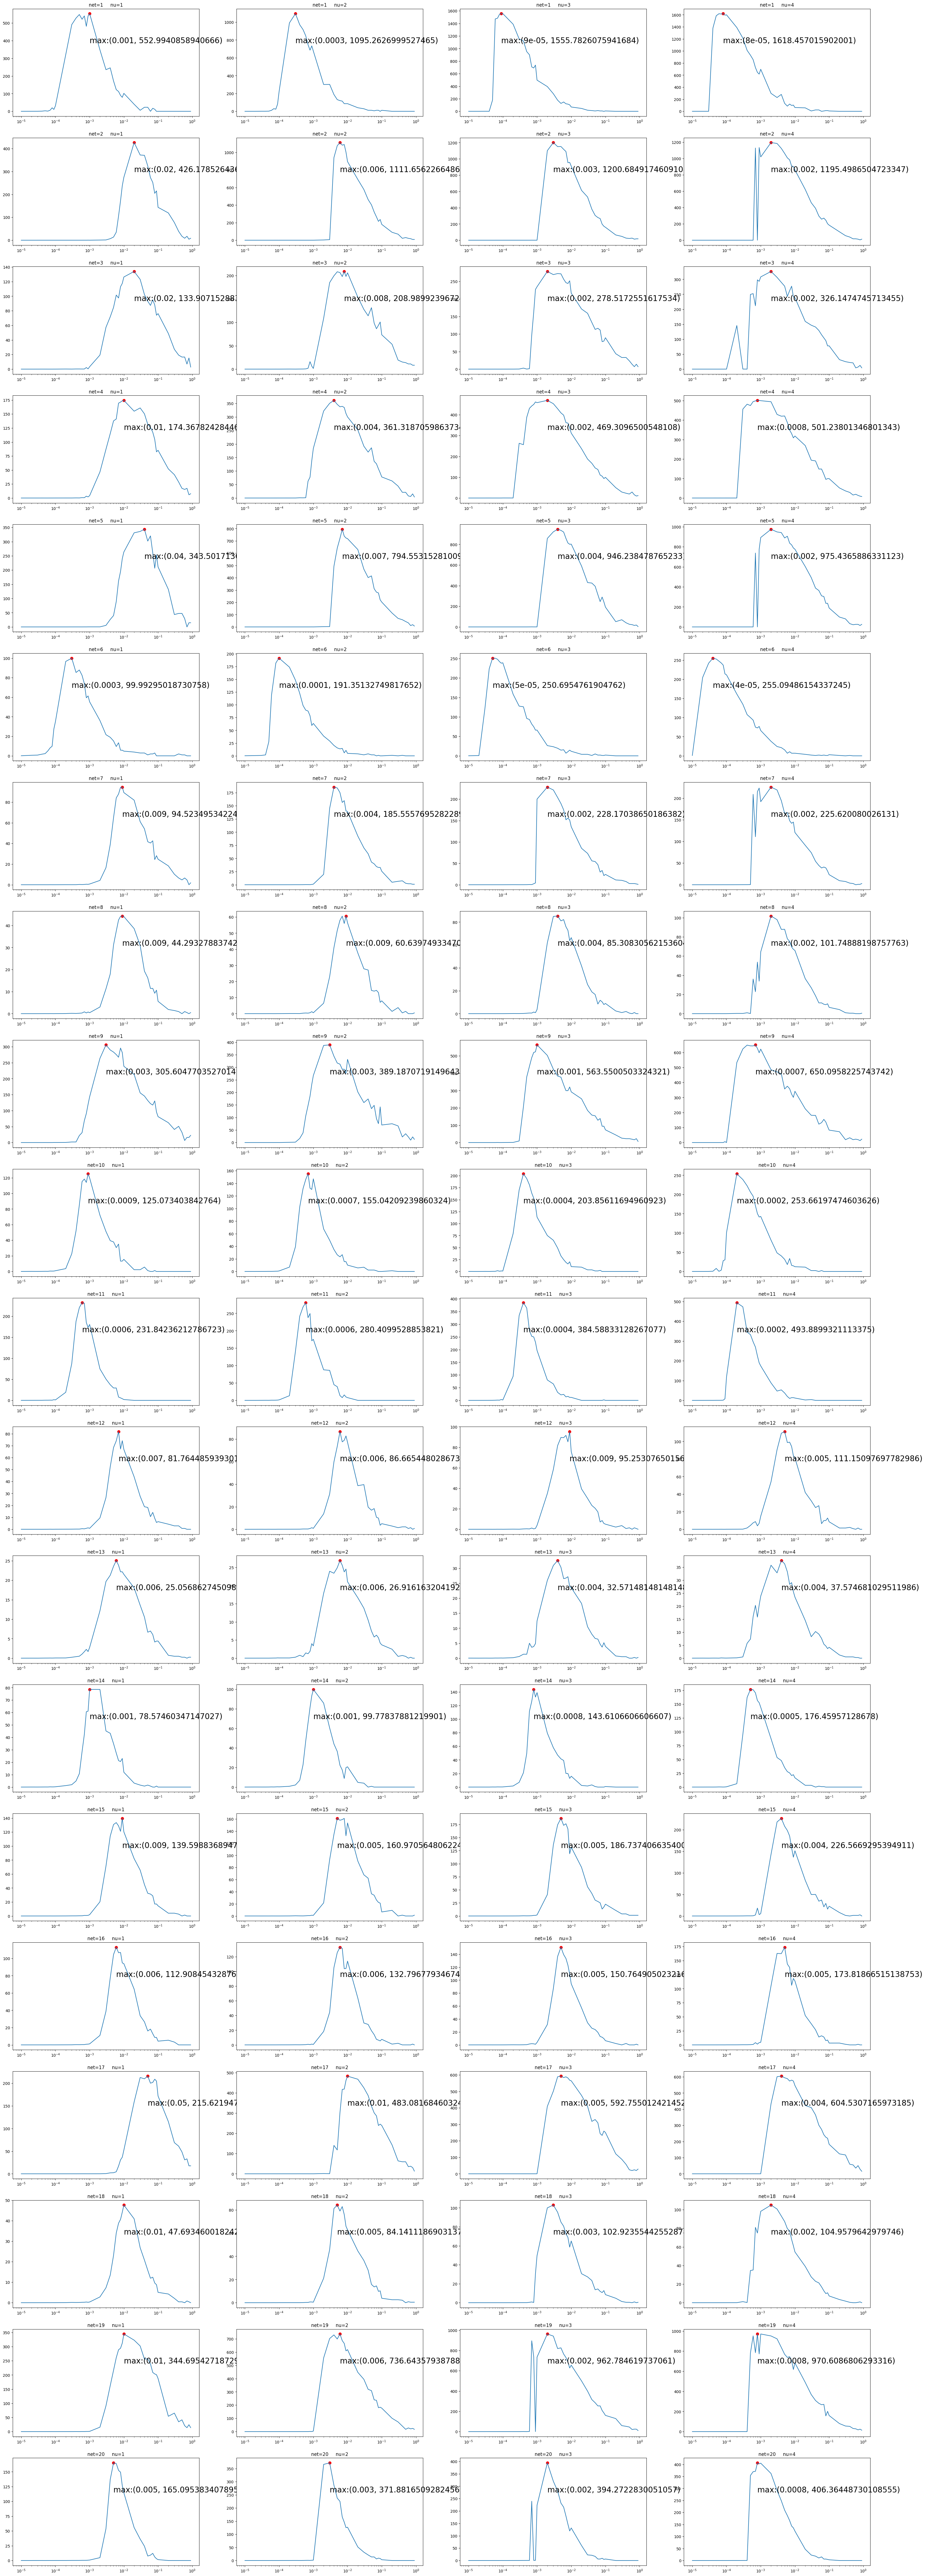

In [3]:
lLst = [
    1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
    1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
    1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
    1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
    1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
    ]
# fig = plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(nrows=20, ncols=4, figsize=(40, 120))
# for i, ax in enumerate(axes.flat):
y_dic = dict()
for net in range(1,21):
    for nu in [1,2,3, 4]:
        y_dic[f'net{net}_nu{nu}'] = []
        argmax = (0, 0)
        for _ in lLst:
            y_dic[f'net{net}_nu{nu}'].append(result[f'net{net}_nu{nu}_l{_}'])
            if result[f'net{net}_nu{nu}_l{_}'] > argmax[1]:
                argmax = (_, result[f'net{net}_nu{nu}_l{_}'])
        
        ax[net-1,nu-1].plot(lLst, y_dic[f'net{net}_nu{nu}'])
        ax[net-1,nu-1].scatter(argmax[0], argmax[1], color='red', s=50)
        font_prop = FontProperties()
        font_prop.set_size(20) 
        ax[net-1,nu-1].annotate(f'max:({argmax[0]}, {argmax[1]})', xy=(argmax[0],0.7*argmax[1]), fontproperties=font_prop)
        ax[net-1,nu-1].set(title=f'net={net}     nu={nu}')
        ax[net-1,nu-1].set_xscale('log') 
# fig.suptitle(f'{filename}',fontsize=18, ha='left', va='bottom')
plt.show()

In [9]:
y

[0.0742308582003305,
 0.1778592049744618,
 0.6618178129438048,
 72.34792641097599,
 72.12700087950749,
 185.94600798403195,
 169.55407301131837,
 144.56926473085412,
 143.60561343355747,
 80.37899027908443,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]